# Batch Normalization

Objetivo: Comprender batch normalization y sus parámetros
- Batch Normalization ayuda a que la red se entrene de forma estable, normalizando la entrada o salida de las activaciones
- La capa normaliza el batch para que en el entrenamiento tenga media igual a 0 y desviación estandar igual a 1

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
K.clear_session()

mnist = keras.datasets.mnist
 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape)  
print(y_test.shape)  

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Leer Dataset

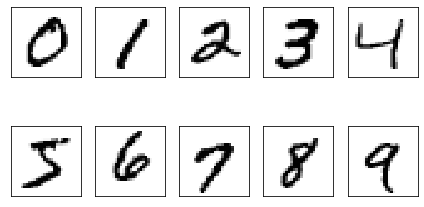

In [3]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = x_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

- Se modifica la forma de los datos de 2-d (n, 28, 28) a 1-d (n, 784)

In [4]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


print(x_train.shape) # (60000, 784)
print(y_train.shape) # (60000,)
print(x_test.shape)  # (10000, 784)
print(y_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [5]:
epoch = 100
verbose = 0
batch = 50

## Momentum

Para controlar la cantidad de estadísticas del mini batch anterior, el parámetro 'momentum' por defecto tiene valor de 0.99. Esto se puede establecer en 0.0 para usar solo estadísticas del mini batch actual.

In [6]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))   
    model.add(Dense(40, activation = 'relu')) 
    model.add(Dense(40, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [7]:
model = make_model()

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                31400     
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_2 (Dense)              (None, 40)                1640      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                410       
Total params: 35,090
Trainable params: 35,090
Non-trainable params: 0
_________________________________________________________________


In [8]:
history1 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [9]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 0s - loss: 0.1850 - accuracy: 0.9623

Test acccuracy: 0.9623


In [10]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))  
    model.add(BatchNormalization(momentum=0.99))        # capa Batchnorm  
    model.add(Dense(40, activation = 'relu'))
    model.add(BatchNormalization(momentum=0.99))        # capa Batchnorm 
    model.add(Dense(40, activation = 'relu')) 
    model.add(BatchNormalization(momentum=0.99))        # capa Batchnorm 
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [11]:
model = make_model()

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                31400     
_________________________________________________________________
batch_normalization (BatchNo (None, 40)                160       
_________________________________________________________________
dense_5 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_6 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_2 (Batch (None, 40)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [12]:
history2 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [13]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 0.0683 - accuracy: 0.9734

Test acccuracy: 0.9734


In [14]:
def make_model():
    model = Sequential()
    
    model.add(Dense(40, input_shape = (784, ), activation = 'relu'))  
    model.add(BatchNormalization(momentum=0.5))        # capa Batchnorm  
    model.add(Dense(40, activation = 'relu'))
    model.add(BatchNormalization(momentum=0.5))        # capa Batchnorm 
    model.add(Dense(40, activation = 'relu')) 
    model.add(BatchNormalization(momentum=0.5))        # capa Batchnorm 
    model.add(Dense(10, activation = 'softmax'))   

    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [15]:
model = make_model()

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 40)                31400     
_________________________________________________________________
batch_normalization_3 (Batch (None, 40)                160       
_________________________________________________________________
dense_9 (Dense)              (None, 40)                1640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 40)                160       
_________________________________________________________________
dense_10 (Dense)             (None, 40)                1640      
_________________________________________________________________
batch_normalization_5 (Batch (None, 40)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [16]:
history3 = model.fit(x_train, y_train, batch_size = batch, validation_split = 0.3,
                    epochs = epoch, verbose = verbose)


In [17]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest acccuracy:', test_acc)

10000/1 - 1s - loss: 0.0753 - accuracy: 0.9714

Test acccuracy: 0.9714


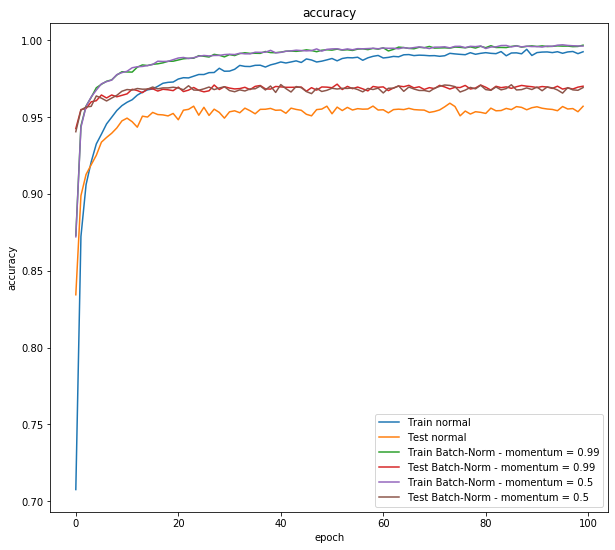

In [18]:
#plot
plt.figure(figsize=(10,9))
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])


plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])

#plt.plot(history4.history['accuracy'])
#plt.plot(history4.history['val_accuracy'])

plt.legend(['Train normal', 'Test normal',
            'Train Batch-Norm - momentum = 0.99', 'Test Batch-Norm - momentum = 0.99',
            'Train Batch-Norm - momentum = 0.5', 'Test Batch-Norm - momentum = 0.5',
            'Train Batch-Norm antes act - momentum = 0.99', 'Test Batch-Norm antes act - momentum = 0.99'])

plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()


- Experimentar con diferentes valores y parámetros
- Experminetar con diferente arquitectura